# 3. Importer des librairies

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import re

In [4]:
from dateutil.relativedelta import relativedelta

In [5]:
import numpy as np

# 4. Créer le dataframe

In [6]:
df = pd.read_excel('donnee_milliardaires.xlsx',sheet_name='Sauvegarde')

In [7]:
df.head()

,rang,categorie,prenomNom,pays,ville,source,domaine,luiMeme,genre,nom,...,revenuFinal,anneeNaissance,moisNaissance,jourNaissance,cpi_pays,pib_pays,esperance_ de_vie_pays,tax_revenue_pays,total_taux_imposition_pays,population_pays
0,1,Mode & Commerce,Bernard Arnault & family,France,Paris,LVMH,Fashion & Retail,False,H,Arnault,...,211000,1949,3,5,110.05,"$2,715,518,274,227",82.5,24.2,60.7,67059887
1,2,Automobile,Elon Musk,États-Unis,Austin,"Tesla, SpaceX",Automotive,True,H,Musk,...,180000,1971,6,28,117.24,"$21,427,700,000,000",78.5,9.6,36.6,328239523
2,3,Technologie,Jeff Bezos,États-Unis,Medina,Amazon,Technology,True,H,Bezos,...,114000,1964,1,12,117.24,"$21,427,700,000,000",78.5,9.6,36.6,328239523
3,4,Technologie,Larry Ellison,États-Unis,Lanai,Oracle,Technology,True,H,Ellison,...,107000,1944,8,17,117.24,"$21,427,700,000,000",78.5,9.6,36.6,328239523
4,5,Finance & Investissements,Warren Buffett,États-Unis,Omaha,Berkshire Hathaway,Finance & Investments,True,H,Buffett,...,106000,1930,8,30,117.24,"$21,427,700,000,000",78.5,9.6,36.6,328239523


In [8]:
df.shape

(481, 21)

In [9]:
df.dtypes

rang                            int64
categorie                      object
prenomNom                      object
pays                           object
ville                          object
source                         object
domaine                        object
luiMeme                          bool
genre                          object
nom                            object
prenom                         object
revenuFinal                     int64
anneeNaissance                  int64
moisNaissance                   int64
jourNaissance                   int64
cpi_pays                      float64
pib_pays                       object
esperance_ de_vie_pays        float64
tax_revenue_pays              float64
total_taux_imposition_pays    float64
population_pays                 int64
dtype: object

# 5. Nettoyage de données

# 5.1. Données manquantes

In [10]:
df[df.isna()].count()

rang                          0
categorie                     0
prenomNom                     0
pays                          0
ville                         0
source                        0
domaine                       0
luiMeme                       0
genre                         0
nom                           0
prenom                        0
revenuFinal                   0
anneeNaissance                0
moisNaissance                 0
jourNaissance                 0
cpi_pays                      0
pib_pays                      0
esperance_ de_vie_pays        0
tax_revenue_pays              0
total_taux_imposition_pays    0
population_pays               0
dtype: int64

# 5.2. Suprimer les doublons

In [13]:
df[df.duplicated()].count()

rang                          6
categorie                     6
prenomNom                     6
pays                          6
ville                         6
source                        6
domaine                       6
luiMeme                       6
genre                         6
nom                           6
prenom                        6
revenuFinal                   6
anneeNaissance                6
moisNaissance                 6
jourNaissance                 6
cpi_pays                      6
pib_pays                      6
esperance_ de_vie_pays        6
tax_revenue_pays              6
total_taux_imposition_pays    6
population_pays               6
dtype: int64

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(475, 21)

# 5.3. Remplacer des valeurs

In [17]:
df['genre'].value_counts()

genre
H    407
F     68
Name: count, dtype: int64

In [20]:
df['genre'] = df['genre'].replace(to_replace=[r'^F$',r'^H$'],value=['femme','homme'],regex=True, inplace=False)

In [21]:
df['genre'].value_counts()

genre
homme    407
femme     68
Name: count, dtype: int64

# 5.4. Ajuster le type de la colonne pib_pays

In [22]:
df.dtypes

rang                            int64
categorie                      object
prenomNom                      object
pays                           object
ville                          object
source                         object
domaine                        object
luiMeme                          bool
genre                          object
nom                            object
prenom                         object
revenuFinal                     int64
anneeNaissance                  int64
moisNaissance                   int64
jourNaissance                   int64
cpi_pays                      float64
pib_pays                       object
esperance_ de_vie_pays        float64
tax_revenue_pays              float64
total_taux_imposition_pays    float64
population_pays                 int64
dtype: object

In [23]:
df['pib_pays'].head(2)

0     $2,715,518,274,227 
1    $21,427,700,000,000 
Name: pib_pays, dtype: object

In [24]:
df['pib_pays'].astype('float64')

ValueError: could not convert string to float: '$2,715,518,274,227 '

In [33]:
list_pib = df['pib_pays'].to_list()
list_pib_nouv = []
for el in list_pib:
    el = re.sub(r'[^\d]+','',el)
    list_pib_nouv.append(el)
print(list_pib[0],list_pib_nouv[0])


$2,715,518,274,227  2715518274227


In [35]:
df['pib_pays'] = pd.Series(list_pib_nouv)

In [36]:
df['pib_pays'] = df['pib_pays'].astype('float64')

In [37]:
df['pib_pays'].dtypes

dtype('float64')

In [38]:
df['pib_pays'].head()

0    2.715518e+12
1    2.142770e+13
2    2.142770e+13
3    2.142770e+13
4    2.142770e+13
Name: pib_pays, dtype: float64

# 5.5. Ajouter la colonne âge

In [40]:
df.columns

Index(['rang', 'categorie', 'prenomNom', 'pays', 'ville', 'source', 'domaine',
       'luiMeme', 'genre', 'nom', 'prenom', 'revenuFinal', 'anneeNaissance',
       'moisNaissance', 'jourNaissance', 'cpi_pays', 'pib_pays',
       'esperance_ de_vie_pays', 'tax_revenue_pays',
       'total_taux_imposition_pays', 'population_pays'],
      dtype='object')

In [41]:
df['dateNaissance'] = df['jourNaissance'].astype('str') + '-' + df['moisNaissance'].astype('str') + '-' + df['anneeNaissance'].astype('str')

In [42]:
df['dateNaissance'].head()

0     5-3-1949
1    28-6-1971
2    12-1-1964
3    17-8-1944
4    30-8-1930
Name: dateNaissance, dtype: object

In [43]:
df['dateNaissance'] = pd.to_datetime(df['dateNaissance'],format='%d-%m-%Y')

In [44]:
df['dateNaissance'].dtypes

dtype('<M8[ns]')

In [45]:
df['today'] = pd.to_datetime('now')

In [47]:
df['age'] = df.apply(lambda x: relativedelta(x.today,x.dateNaissance).years, axis=1)

In [48]:
df['age'].head()

0    75
1    52
2    60
3    79
4    93
Name: age, dtype: int64

# 6. Analyse des données

# 6.1. Lister le top 5 des milliardaires

In [49]:
df.columns

Index(['rang', 'categorie', 'prenomNom', 'pays', 'ville', 'source', 'domaine',
       'luiMeme', 'genre', 'nom', 'prenom', 'revenuFinal', 'anneeNaissance',
       'moisNaissance', 'jourNaissance', 'cpi_pays', 'pib_pays',
       'esperance_ de_vie_pays', 'tax_revenue_pays',
       'total_taux_imposition_pays', 'population_pays', 'dateNaissance',
       'today', 'age'],
      dtype='object')

In [50]:
df = df.sort_values(by='revenuFinal',ascending=False)

In [51]:
df[['prenomNom','revenuFinal']].head()

,prenomNom,revenuFinal
0,Bernard Arnault & family,211000
1,Elon Musk,180000
2,Jeff Bezos,114000
3,Larry Ellison,107000
4,Warren Buffett,106000


# 6.2. Le nombre de milliardaires par intervalle d'âge

In [53]:
df['age'].max(),df['age'].min()

(97, 32)

In [67]:
df_intervals = df['age'].value_counts().rename_axis('age').reset_index(name='counts')
bins = [30,45,60,75,90,105]
labels=['[30-45]','[45-60]','[60-75]','[75-90]','[90-105]']
df_intervals = df_intervals['counts'].groupby(pd.cut(df_intervals['age'], bins=bins, labels=labels)).sum()

/var/folders/xq/kk04cqfx4xd55xcsbgb8rkqc0000gp/T/ipykernel_1554/3983198760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_intervals = df_intervals['counts'].groupby(pd.cut(df_intervals['age'], bins=bins, labels=labels)).sum()


In [68]:
df_intervals

age
[30-45]      26
[45-60]     122
[60-75]     180
[75-90]     125
[90-105]     22
Name: counts, dtype: int64

# 6.3. Visualisation des données

In [69]:
df5 = df[['prenomNom','revenuFinal']].head()

<Axes: xlabel='prenomNom', ylabel='revenuFinal'>

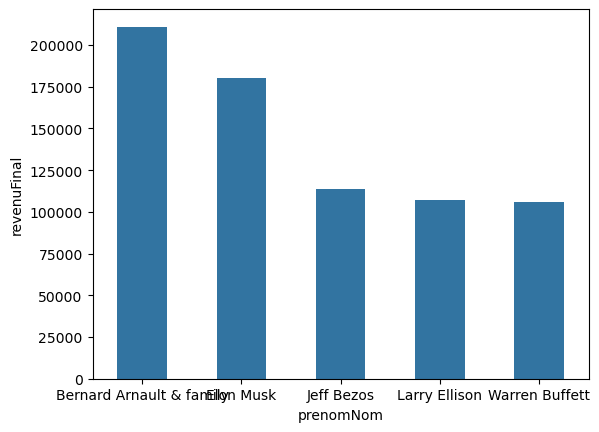

In [73]:
sns.barplot(df5, x='prenomNom',y='revenuFinal', width=.5)

<Axes: xlabel='age', ylabel='counts'>

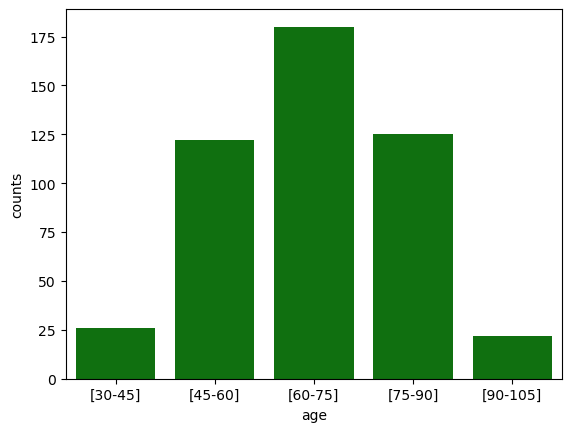

In [74]:
sns.barplot(df_intervals, color='green')